# Multiple Linear Regression 

## 1 - Load Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MLR_utils import computeCost

%matplotlib inline

In [2]:
df = pd.read_pickle('./Data/train_final')
m = df.shape[0]

In [3]:
df.head()

,YearBuilt,TotRmsAbvGrd,logSalePrice,logGrLivArea,logLotArea,PUD,OthBldgType,THBldgType,1.5Story,2.0Story,...,Inside,OthLotCnfg,OthSlope,RegShape,NLevel,NFence,WoodDeck,OpenPorch,NEnclsdPorch,ScrnPorch
0,2003,8,12.247694,7.444249,9.041922,0,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
1,1976,6,12.109011,7.140453,9.169518,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
2,2001,6,12.317167,7.487734,9.328123,0,0,0,0,1,...,1,0,0,0,0,1,0,1,1,0
3,1915,7,11.849398,7.448334,9.164296,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,2000,9,12.429216,7.695303,9.565214,0,0,0,0,1,...,0,1,0,0,0,1,1,1,1,0


## 2 - Split into Training and Validation Sets

We will split the training data into a smaller training set (70%) and a validation set (30%).  **Note that the validation set is denoted here as X_test and y_test.**

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('logSalePrice',axis=1)
y = df['logSalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

## 3 - Fit Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()
lm.fit(X_train,y_train)

theta_hat = np.r_[lm.intercept_,lm.coef_]
X_train_1 = np.c_[np.ones((X_train.shape[0],1)),X_train]

In [7]:
theta_hat = theta_hat.reshape((len(theta_hat),1))

y_tr = y_train.values.reshape((len(y_train),1))
X_val_1 = np.c_[np.ones((X_val.shape[0],1)), X_val]
y_te = y_val.values.reshape((len(y_val),1))

error_train = computeCost(theta_hat,X_train_1,y_tr)
error_val = computeCost(theta_hat,X_val_1,y_te)

print("Training Error: " + str(error_train))
print("Validation Error: " + str(error_val))

Training Error: 0.007568033439315971
Validation Error: 0.011185798456694027


## 3 - Prediction and Residual Plots (Validation Set)

Make sure to use the **not scaled** outputs in this section!

In [8]:
predictions = lm.predict(X_val)

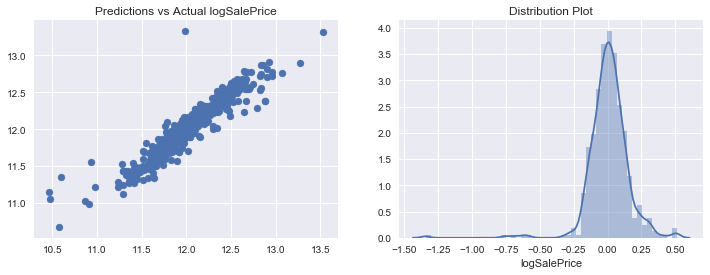

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(y_val,predictions)
axes[0].set_title("Predictions vs Actual logSalePrice")

sns.distplot((y_val-predictions),bins=50);
axes[1].set_title("Distribution Plot");

## 4 - Performance Evaluation Metrics (Validation Set)

In [10]:
from sklearn import metrics
print('log-scale MSE:', round(np.sqrt(metrics.mean_squared_error(y_val, predictions)),10))

log-scale MSE: 0.1495713773


In [11]:
preds = pd.Series(data=predictions)
y_val_ri = y_val.reset_index()
y_val_ri.drop('index',axis=1,inplace=True)
compare = pd.concat([y_val_ri['logSalePrice'],preds],axis=1)
compare.rename(columns={0: 'prediction'}, inplace=True)
compare = compare.apply(lambda x: round(np.exp(x),1))
compare['SalePrice'] = compare['logSalePrice']
compare.drop('logSalePrice', axis=1, inplace=True)
compare['difference'] = compare['SalePrice']-compare['prediction']
#print(compare.head())

In [12]:
from sklearn import metrics
mse = round(metrics.mean_squared_error(np.exp(y_val), np.exp(predictions)),1)
print('Validation MSE:', "{:,}".format(mse))

Validation MSE: 1,244,172,693.4


In [13]:
pd.options.display.float_format = '{:,.2f}'.format
print(compare.head(10))

   prediction  SalePrice  difference
0  251,229.50 255,000.00    3,770.50
1  137,790.70 145,000.00    7,209.30
2  141,322.40 150,500.00    9,177.60
3  401,586.30 412,500.00   10,913.70
4  331,098.20 402,861.00   71,762.80
5  106,560.10 113,000.00    6,439.90
6  137,950.30 136,000.00   -1,950.30
7  150,397.40 144,152.00   -6,245.40
8  151,361.10 145,250.00   -6,111.10
9  146,118.30 135,000.00  -11,118.30


## 5 - Test Predictions

In [28]:
#test set features
X_test = pd.read_pickle('./Data/test_final')

In [29]:
test_prediction = lm.predict(X_test)

In [30]:
test_price = np.exp(test_prediction)

In [31]:
#get ID's
id_test = pd.read_csv('./Data/test')

In [32]:
id_test['SalePrice'] = test_price

In [33]:
id_test[['Id','SalePrice']].head()

,Id,SalePrice
0,1461,"126,670.98"
1,1462,"162,098.12"
2,1463,"190,500.22"
3,1464,"207,386.70"
4,1465,"181,653.04"


In [34]:
test_submit = id_test[['Id','SalePrice']]

In [35]:
test_submit.to_csv('./Data/testsaleprice.txt', header = True, index = False, sep=',')